In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import glob

In [36]:
"""wd = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20170325'
annotated = pd.read_table(
    os.path.join(wd, '218_01.basedon_218_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'),
    names=['chrom','start','end','l10p','l2fc','strand','region2','genename']
)
annotated.head()"""



,chrom,start,end,l10p,l2fc,strand,region2,genename
0,chr7,134618012,134618142,19.046010,5.502206,+,CDS|partial|ENSG00000122786.15,ENSG00000122786.15
1,chr7,138205524,138205659,17.683470,5.404909,+,intron|contained|ENSG00000122779.12,ENSG00000122779.12
2,chr7,134632361,134632521,15.165642,6.107927,+,CDS|partial|ENSG00000122786.15,ENSG00000122786.15
3,chr7,139094303,139094407,14.704848,6.066107,+,CDS|partial|ENSG00000146963.13:ENSG00000269955.2,ENSG00000146963.13|ENSG00000269955.2
4,chr7,155493466,155493583,14.244399,6.023038,+,CDS|partial|ENSG00000184863.6,ENSG00000184863.6


In [37]:
def get_region(row):
    try:
        return row['region2'].split('|')[0]
    except Exception:
        return '-'
    
def filt(df):
    return df[df['l2fc']>3]

annotatedf = filt(annotated)
annotatedf['region'] = annotatedf.apply(get_region, axis=1)

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [38]:
annotatedf['region2'].value_counts()

CDS                 3297
intron               666
noncoding_exon       112
noncoding_intron     100
5utr                  77
3utr                  58
intergenic             1
5utr_and_3utr          1
Name: region, dtype: int64

In [68]:
wd = '/home/bay001/projects/parp13_ago2_20180201/permanent_data/eCLIP-0.1.7/07_clip_figures/inputs/'
annotated = pd.read_table(
    os.path.join(wd, 'PARP13.WTSS1P.---.r-.fqTrTrU-SoMaSoCpSoMeV2ClN-C-Fc3Pv3.bed.minus_KOSS1P.bed.annotated'),
    names=['chrom','start','end','l10p','l2fc','strand','geneid','genename','region','annotated']
)
annotated.head()

,chrom,start,end,l10p,l2fc,strand,geneid,genename,region,annotated
0,chr17,18965362,18965451,188.383153,7.783650,+,ENSG00000265185.2,SNORD3B-1,noncoding_exon,ENSG00000265185.2:18965224:18965807:+:gene:ENS...
1,chr17,39847033,39847059,67.705181,4.462176,+,ENSG00000173812.6,EIF1,CDS,ENSG00000173812.6:39845136:39848920:+:gene:ENS...
2,chr17,39846437,39846441,61.414336,4.416665,+,ENSG00000173812.6,EIF1,CDS,ENSG00000173812.6:39845136:39848920:+:gene:ENS...
3,chr17,39846418,39846425,59.163682,3.767270,+,ENSG00000173812.6,EIF1,CDS,ENSG00000173812.6:39845136:39848920:+:gene:ENS...
4,chr17,39846425,39846437,56.886190,3.645561,+,ENSG00000173812.6,EIF1,CDS,ENSG00000173812.6:39845136:39848920:+:gene:ENS...


In [78]:
def filt(df):
    return df[df['l2fc']>4]

annotatedf = filt(annotated)
annotatedf['region'].value_counts()

CDS                 341
3utr                264
intron              181
5utr                 42
noncoding_exon       29
noncoding_intron     20
Name: region, dtype: int64

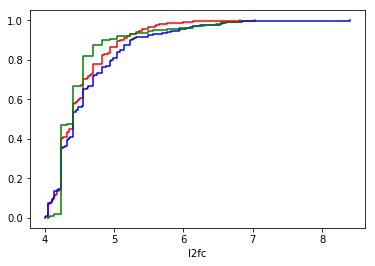

In [79]:

def cdf(ser, color):
    ser[len(ser)] = ser.iloc[-1]

    # Create a new series with the sorted values as index and the cumulative distribution as values:

    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)

    # Finally, plot the function as steps:

    ser_cdf.plot(drawstyle='steps', color=color)
    
ser = annotatedf[annotatedf['region']=='CDS']['l2fc'].sort_values().reset_index()['l2fc']
cdf(ser, 'red')
ser = annotatedf[annotatedf['region']=='3utr']['l2fc'].sort_values().reset_index()['l2fc']
cdf(ser, 'blue')
ser = annotatedf[annotatedf['region']=='intron']['l2fc'].sort_values().reset_index()['l2fc']
cdf(ser, 'green')

In [73]:
print('cds', annotatedf[annotatedf['region']=='CDS']['l2fc'].mean())
print('intron', annotatedf[annotatedf['region']=='intron']['l2fc'].mean())
print('3utr',annotatedf[annotatedf['region']=='3utr']['l2fc'].mean())

('cds', 5.3935553440289121)
('intron', 5.8334318843394115)
('3utr', 5.5927800110454902)
